### Computer vision. Object detection

Please, see pictures in images.zip 
These picture correspond to classes from COCO dataset 
https://cocodataset.org/#home 
You don’t need dataset itself, just be aware of its classes names. You can find them on the website
You are not supposed to train a neural network. You have to use existing model trained on COCO dataset for object detection. Fortunately, this is, probably, one of the famous image datasets. So, there are a lot of models trained on it. 
The result should present boxes drawn on the pictures around the found objects. Each box should contain the name of the object class according to the COCO dataset and score of belonging object to this class. Show only detections where score is above 0.5.

For this task you can use any Python libraries. But, please, your solution should not require installation of additional software except of python libraries. GPU is not required. But you can use it, if you want
We suggest you to use tensorflow and, maybe, opencv to preprocess the pictures and load a pre-trained model from tensorflow hub https://tfhub.dev/tensorflow/collections/object_detection/1     
They pre-trained on COCO 2017. 
Hint. If you follow this way, after conversion of the image into the tensor, you have to add a dimension tf.expand_dims(tensor, 0).

Please, write comments in your code
Provide code, and list of installed libraries (requirements.txt).

___

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import cv2
import os
import random
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
%matplotlib inline

Made a dictionary with classes names that I found on the COCO website.

In [2]:
from coco_labels_dict import category_map

In [3]:
model_url = 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_1024x1024/1'
inception_resnet_detector = hub.load(model_url)

In [4]:
def open_images(path):
    
    image_paths = [os.path.join(path, file) for file in os.listdir(path)]
    images = []
    images_shape = [] 
    
    for image_path in image_paths:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
        images_shape.append(image.shape)
        
    return images, images_shape

In [5]:
images, images_shape = open_images(r'images')

In [6]:
def prepare_images(images):
    
    '''The function prepares images for coming detection.'''
    
    prepared_images = []

    for image in images:
        images_shape.append(image.shape)
        image = tf.image.resize(image, (1024, 1024)) # shape of image required for detector
        image = tf.cast(image, tf.uint8)
        image = tf.expand_dims(image, axis=0)        # thanks for the hint, pal)
        prepared_images.append(image)
        
    return prepared_images

In [7]:
prepared_images = prepare_images(images)

Let's have a quick look at the images, that we'll try to spot classes on.

In [8]:
def plot_pictures(images_list):
    
    '''The function plots preprocessed images in form of 2x3 block.'''
    
    plt.figure(figsize=(20, 14))
    
    for i in range(len(images_list)):
        image = images_list[i]
        plt.subplot(2, 3, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

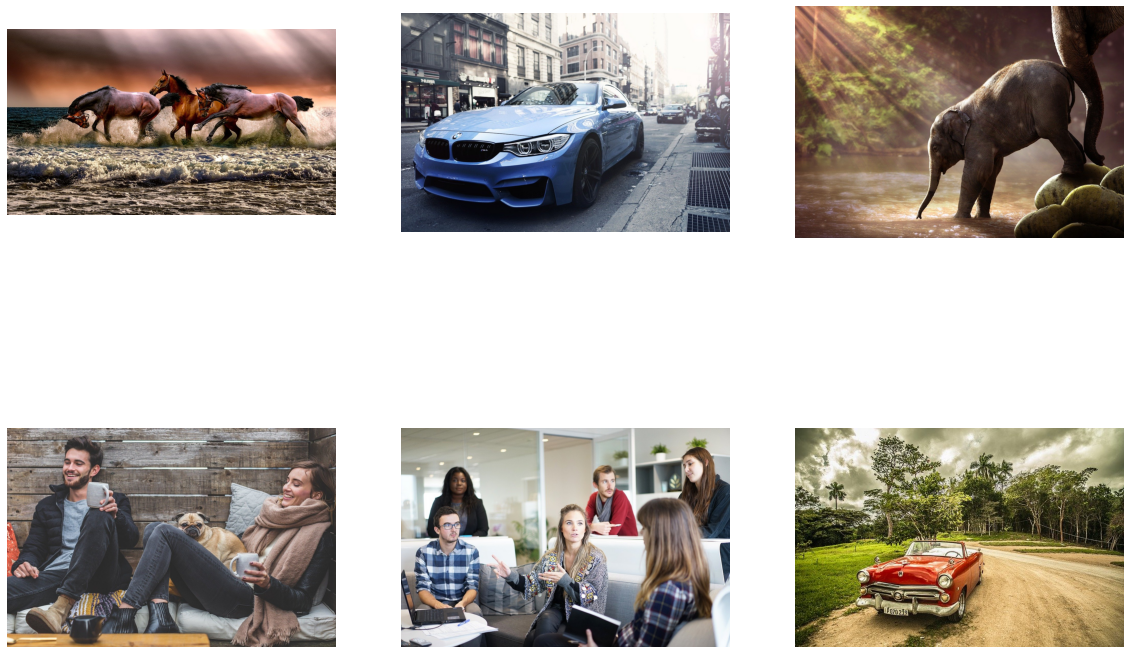

In [9]:
plot_pictures(images)

Now let's use our detector to find objects belonging to specific classes.

In [10]:
def get_detection_results(prepared_images):
    
    '''
        The function applies detector to each of images, 
        and gets list with detecting information.
        
    '''
    
    results = []
    for i in range(len(prepared_images)):
        detection = inception_resnet_detector(prepared_images[i])
        results.append(detection)
    return results

In [11]:
results = get_detection_results(prepared_images)

So we have all information needed to draw spoted objects.

In [12]:
def draw_boxes_and_write_text(image, image_shape, boxes, classes, scores, max_boxes=8, score_threshold=0.75):
    
    '''The function draw boxes and text referring to detected class.'''
    
    colors_dict = {}
    
    height = image_shape[0]
    width = image_shape[1]
    
    for i in range(0, max_boxes):     
        if scores[i] >= score_threshold:
            if int(classes[i]) not in colors_dict.keys():
                colors_dict[int(classes[i])] = (random.randint(0, 255), 
                                                random.randint(0, 255), 
                                                random.randint(0, 255))
                
            ymin, xmin, ymax, xmax = tuple(boxes[i])
            display_str = "{}: {}%".format(category_map[int(classes[i])], int(100 * scores[i]))
            
            image = cv2.rectangle(image, (int(xmin*width), int(ymin*height)), (int(xmax*width), int(ymax*height)), 
                                  colors_dict[int(classes[i])], 2)
            image = cv2.putText(image, display_str, (int(xmin*width+10), int(ymax*height-10)), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 1)

    return image

In [13]:
for i in range(len(images)):
    draw_boxes_and_write_text(images[i], images_shape[i], 
                              results[i]["detection_boxes"][0], 
                              results[i]["detection_classes"][0], 
                              results[i]["detection_scores"][0])

Final step, let's see what we've got.

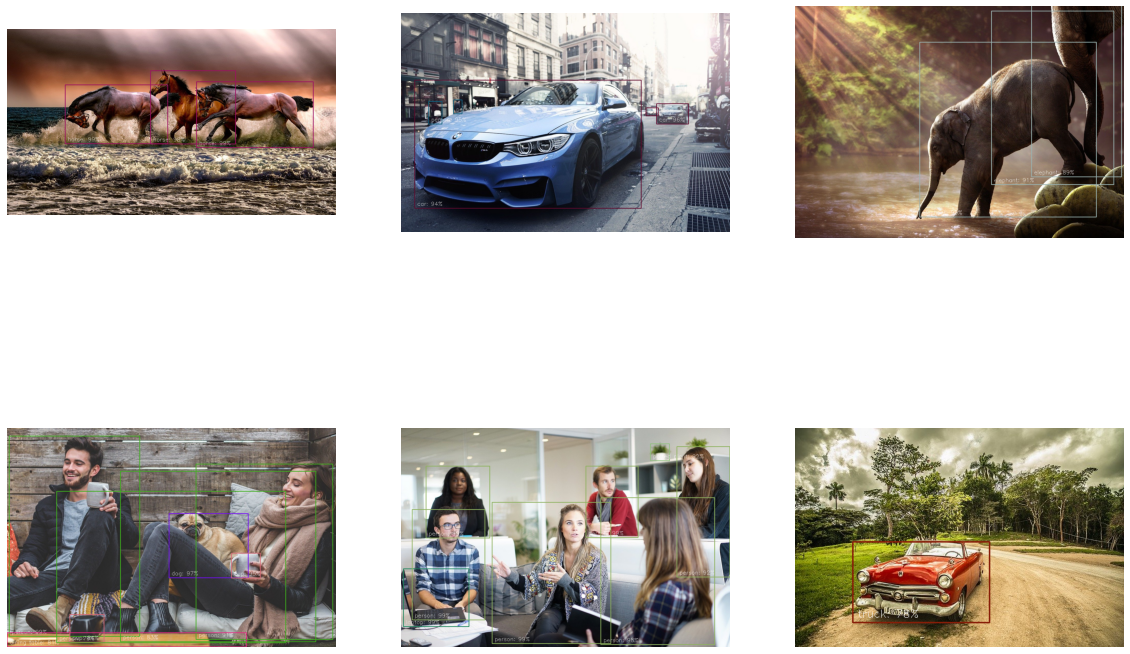

In [14]:
plot_pictures(images)

In [15]:
def display_image(image):
    fig = plt.figure(figsize=(12, 8))
    plt.imshow(image)

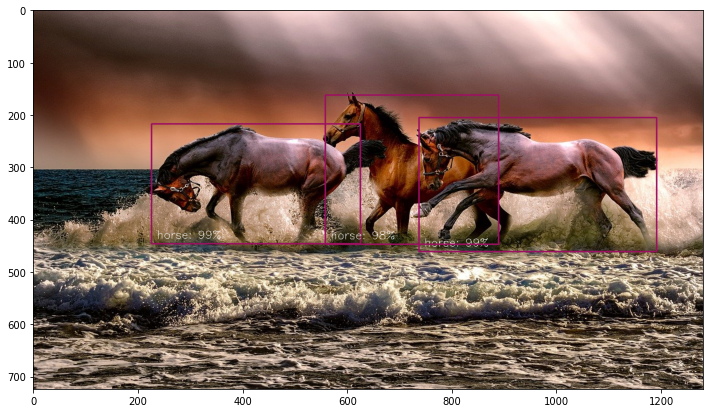

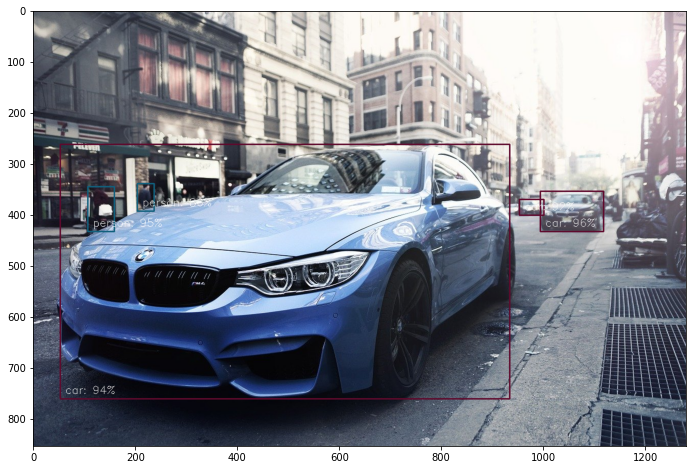

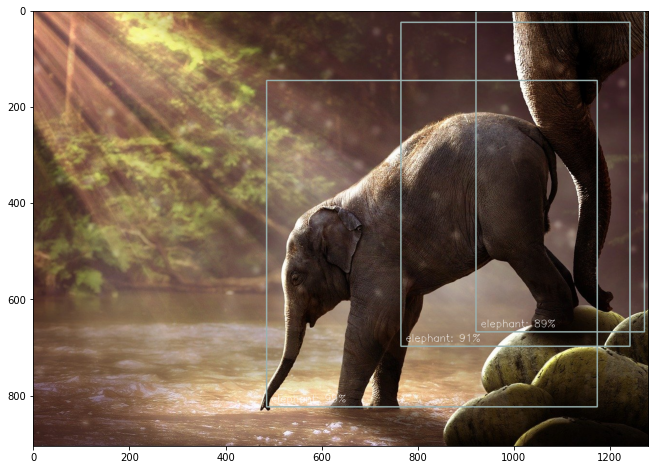

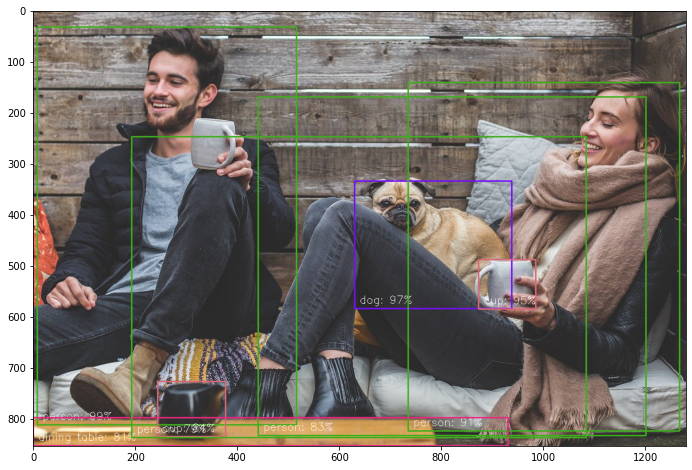

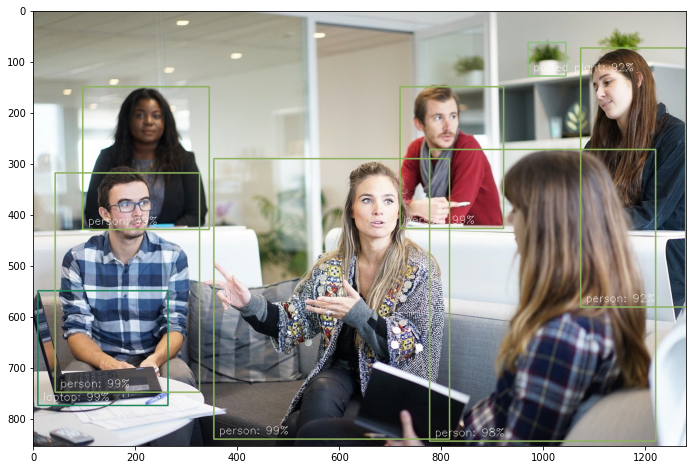

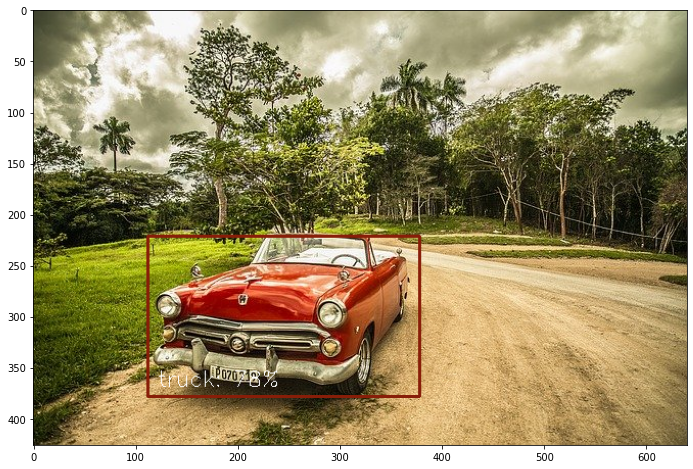

In [16]:
for i in range(len(images)):
    display_image(images[i])

In conclusion, we managed to use the existing neural network model to detect objects in pictures. 

___